In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [16]:
# Load the dataset
df = pd.read_excel("/content/heart_disease(1).xlsx")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [17]:
# Step 1: Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None

Summary Statistics:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484

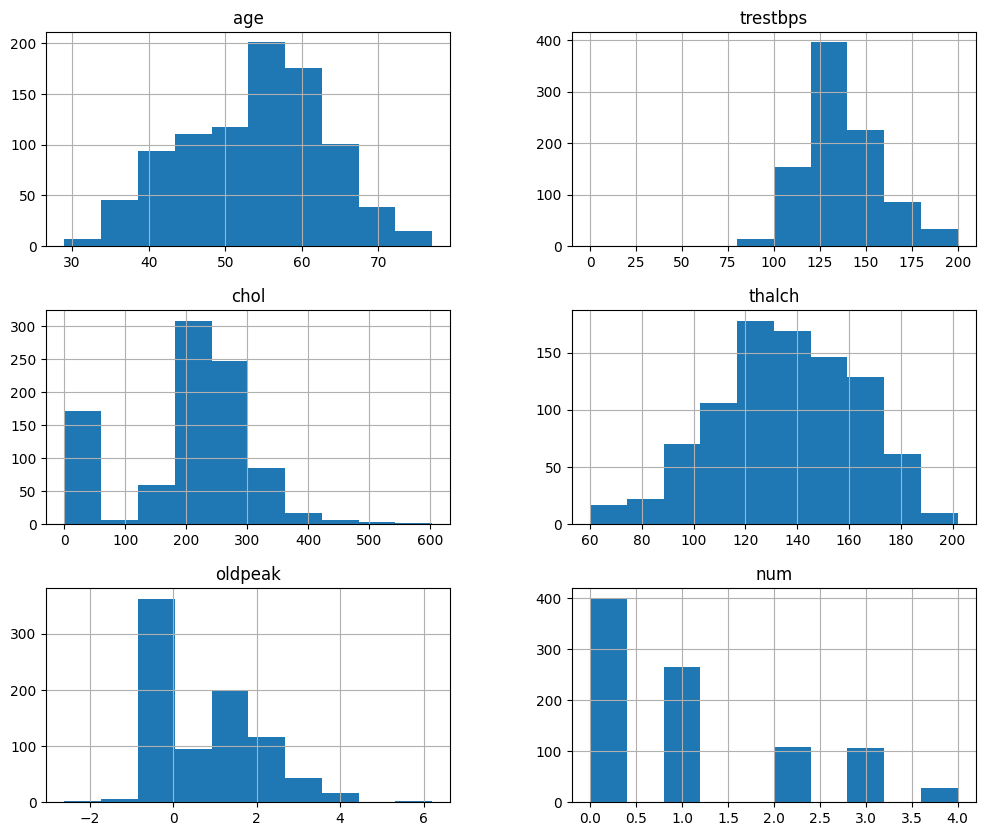

In [18]:
# Visualize the distribution of features
df.hist(figsize=(12, 10))
plt.show()

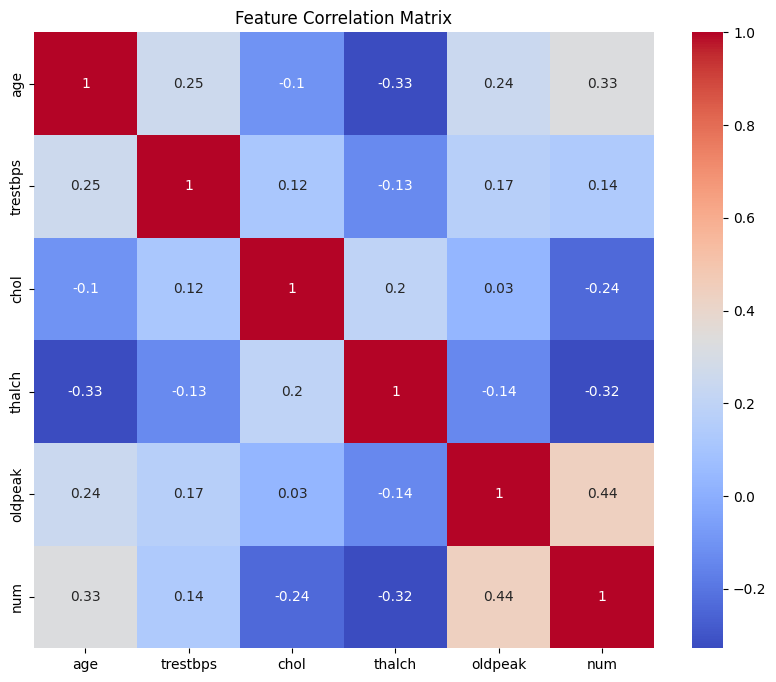

In [19]:
# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [20]:
# Step 2: Data Preparation and Feature Engineering
# Handle missing values (if any)
df = df.fillna(numeric_df.median())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [21]:
# Convert categorical variables to numerical using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,True,False,False,False,True,False,False,False,False,False,True,False,True
904,62,166,170,False,120,3.0,4,True,False,False,False,False,True,True,False,False,True,False,False,True
905,56,170,0,False,123,2.5,4,True,False,True,False,False,False,True,False,False,False,False,True,False
906,56,144,208,True,105,0.5,4,True,False,True,False,False,True,False,False,True,False,False,False,False


In [22]:
# Split the dataset into training and testing sets
X = df.drop("num", axis=1)  # num is a target variable
y = df["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Step 3: Decision Tree Classification
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Evaluate the model
y_pred = clf.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred,average='weighted'))
y_pred_proba = clf.predict_proba(X_test)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba,multi_class='ovr',average="micro"))


Model Evaluation:
Accuracy: 0.46703296703296704
Precision: 0.4742773242553848
Recall: 0.46703296703296704
F1-Score: 0.46883222530374696
ROC-AUC Score: 0.6668956043956045


In [25]:
# Step 4: Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [26]:
# Step 5: Final Model Evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nFinal Model Evaluation:")
print(classification_report(y_test, y_pred_best))


Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        89
           1       0.34      0.44      0.38        48
           2       0.22      0.09      0.13        22
           3       0.14      0.12      0.13        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.28      0.28      0.28       182
weighted avg       0.48      0.52      0.49       182



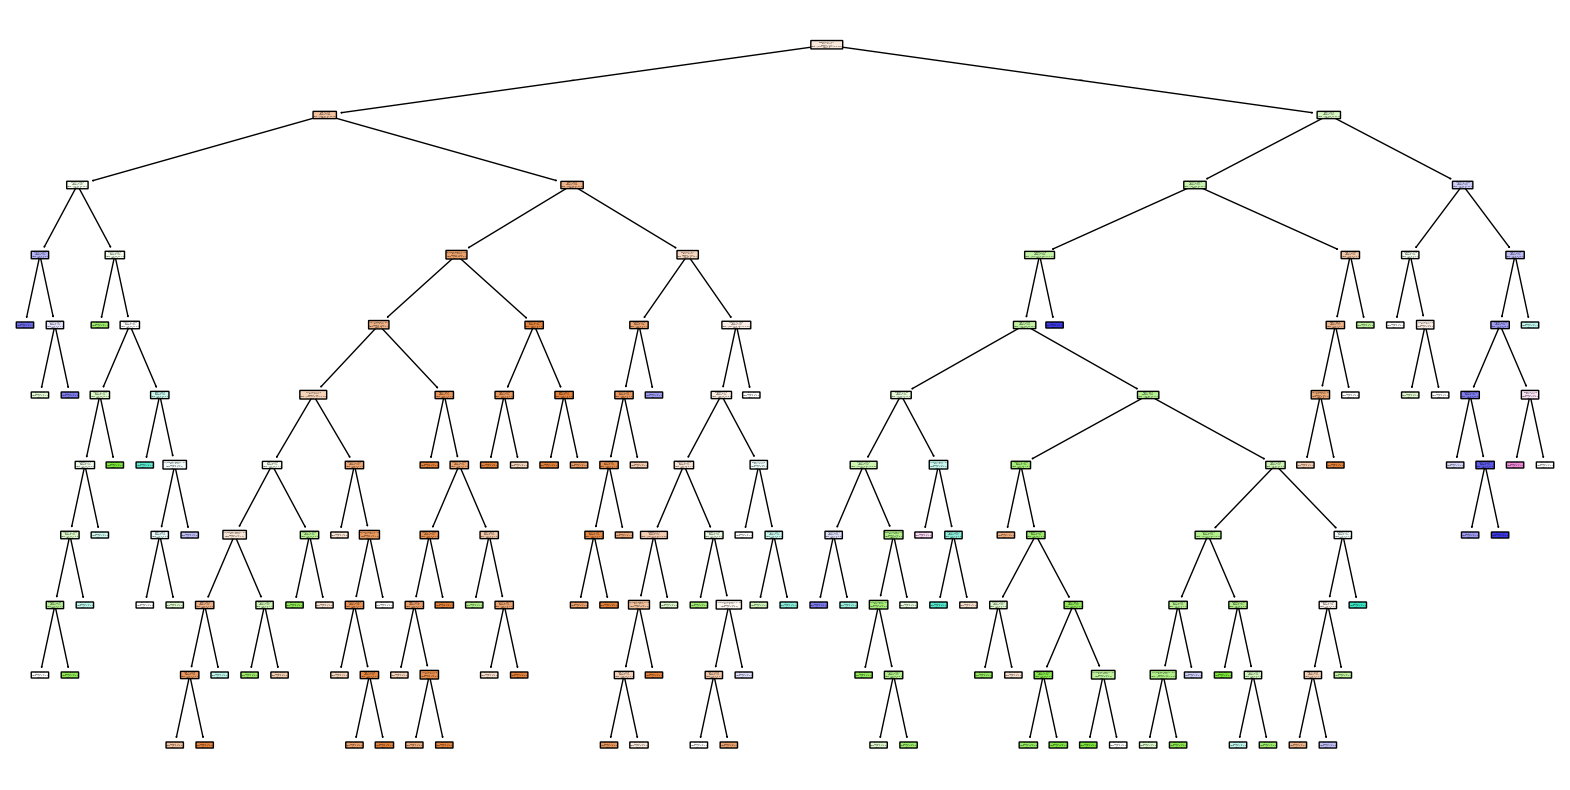

In [27]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
class_names = [str(i) for i in y.unique()]
plot_tree(best_model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()

In [29]:
 '''
 Interview Questions :
Q1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans:
1.Maximum depth : The maximum number of levels (or layers) in the tree.
It matters for : 1. A deep tree can learn very well from the training data, but it might also memorize it (this is called overfitting).
                   2.A shallow tree might not learn enough (called underfitting).
2. Minimum samples split : The minimum number of samples (data points) needed to split a node.
It matters for : 1.A small number can lead to very detailed trees (risk of overfitting).
                 2.A larger number forces the tree to be simpler (can help avoid overfitting).
3. Minimum samples leaf : The minimum number of samples needed in a leaf node (the final nodes).
It matters for : 1.Small values let the tree make more specific decisions.
                 2.Larger values make the tree more general and smooth out predictions.
4. Maximum features : The number of features the model looks at when making a split.
It matters for : 1.Limiting features can help the model avoid overfitting and speed up training.
                 2.Looking at all features may improve accuracy but could slow things down.
5. Maximum leaf nodes : The maximum number of leaf nodes (end points) the tree can have.
It matters for : Helps control the size of the tree and prevents it from growing too complex.
6. Criterion : The function used to measure how good a split is.
Common options: 'gini' or 'entropy' (for classification).
It matters for : It decides how the tree splits the data. Both work similarly, but one might perform slightly better depending on your data.
In short: Too flexible = may overfit (memorize training data too well).
          Too strict = may underfit (not learn enough).
The key is to find the right balance by tuning these hyperparameters.

Q2. What is the difference between the Label encoding and One-hot encoding?
Ans :
Label encoding and One-hot encoding are two ways to convert words or categories into numbers so that a machine learning model can understand them.
Label encoding gives each category a unique number, like turning “red”, “green”, and “blue” into 0, 1, and 2. It's simple and works well when the categories have a natural order. But if there's no order, it might confuse the model into thinking one value is "bigger" or "smaller" than another.
One-hot encoding, on the other hand, creates a new column for each category and uses 0s and 1s to show which one it is. So “red”, “green”, and “blue” become three columns, and if the color is “red”, it would be [1, 0, 0]. This avoids the problem of the model thinking there's an order, but it can create a lot of columns if there are many categories.
In short, label encoding is simpler but can mislead models, while one-hot encoding is safer for unordered categories but uses more space.
'''






'\nInterview Questions :\nQ1. What are some common hyperparameters of decision tree models, and how do they affect the model\'s performance?\nAns:\n1.Maximum depth : The maximum number of levels (or layers) in the tree.\nIt matters for : 1. A deep tree can learn very well from the training data, but it might also memorize it (this is called overfitting).\n                  2.A shallow tree might not learn enough (called underfitting).\n2. Minimum samples split : The minimum number of samples (data points) needed to split a node.\nIt matters for : 1.A small number can lead to very detailed trees (risk of overfitting).\n                2.A larger number forces the tree to be simpler (can help avoid overfitting).\n3. Minimum samples leaf : The minimum number of samples needed in a leaf node (the final nodes).\nIt matters for : 1.Small values let the tree make more specific decisions.\n                2.Larger values make the tree more general and smooth out predictions.\n4. Maximum featur